# EDA

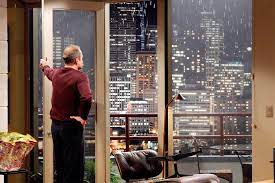

#### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from shapely.geometry import MultiPoint
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load files needed for the EDA

In [2]:
df_sales = pd.read_csv("data/eda_sales.csv")
df_details = pd.read_csv("data/eda_details.csv")

In [3]:
df_sales

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5
...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593
21593,2015-02-23,400000.000,6600060120,21594
21594,2014-06-23,402101.000,1523300141,21595
21595,2015-01-16,400000.000,291310100,21596


In [4]:
df_details = df_details.rename(columns={"id": "house_id"})
df_details

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,993002177,3.000,2.500,1380.000,1547.000,3.000,0.000,0.000,3,8,1380.000,0.000,2000,NaN,98103,47.691,-122.341,1380.000,1465.000
21416,993002225,3.000,2.250,1520.000,1245.000,3.000,NaN,0.000,3,8,1520.000,0.000,2004,0.000,98103,47.691,-122.340,1520.000,1470.000
21417,993002247,3.000,2.250,1550.000,1469.000,3.000,0.000,0.000,3,8,1550.000,0.000,2004,0.000,98103,47.691,-122.341,1520.000,1465.000
21418,993002325,2.000,1.500,950.000,4625.000,1.000,0.000,0.000,4,7,950.000,0.000,1949,NaN,98103,47.691,-122.340,1440.000,4625.000


### Show floats with 2 decimal places and combine files

In [42]:
# Show floats with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight')

df_merged = pd.merge(df_details, df_sales, on="house_id", how="outer")
df_merged

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,id
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00",2495
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,1991,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00",2496
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,1947,0.00,98166,47.44,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00",6730
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,1952,0.00,98166,47.44,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00",8405
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,1930,0.00,98168,47.48,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00",8801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,1927,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00",16724
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,1939,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00",3258
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,1942,NaN,98126,47.53,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00",7615
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,2011,0.00,98027,47.54,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00",20964


# Understanding the data
Examine the descriptive statistics of the dataset.
Check for missing values. Are they concentrated in some column or in some observations?
Check which features are continuous or categorical.

In [43]:
# Rename columns
df_merged = df_merged.rename(columns={"yr_built": "year_built", "yr_renovated": "year_renovated"})

# Extract year, month, day-of-week out of column date and build new column for each
df_merged['date'] = pd.to_datetime(df_merged['date'], format='ISO8601')
df_merged["date_year"]=df_merged["date"].dt.year
df_merged["date_month"]=df_merged["date"].dt.month
df_merged["date_day"]=df_merged["date"].dt.day
df_merged["date_weekday"]=df_merged["date"].dt.dayofweek

df_merged

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,id,date_year,date_month,date_day,date_weekday
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00",2495,2014,9,16,1
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00",2496,2015,4,22,2
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00",6730,2014,5,8,3
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00",8405,2014,8,11,0
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00",8801,2015,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00",16724,2014,7,25,4
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00",3258,2015,3,11,2
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00",7615,2014,6,24,1
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00",20964,2014,7,3,3


In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   house_id        21597 non-null  int64         
 1   bedrooms        21597 non-null  float64       
 2   bathrooms       21597 non-null  float64       
 3   sqft_living     21597 non-null  float64       
 4   sqft_lot        21597 non-null  float64       
 5   floors          21597 non-null  float64       
 6   waterfront      19206 non-null  float64       
 7   view            21534 non-null  float64       
 8   condition       21597 non-null  int64         
 9   grade           21597 non-null  int64         
 10  sqft_above      21597 non-null  float64       
 11  sqft_basement   21145 non-null  float64       
 12  year_built      21597 non-null  int64         
 13  year_renovated  17749 non-null  float64       
 14  zipcode         21597 non-null  int64         
 15  la

### Check for duplicate rows

In [44]:
# no duplicated rows
df_merged.duplicated().value_counts()

# Check for duplicate house IDs --> some houses were sold more than once
df_merged["house_id"].duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

### Display number of missing values per column

In [46]:
df_merged.isna().sum()

house_id             0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2360
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      451
year_built           0
year_renovated    3811
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
date                 0
price                0
id                   0
date_year            0
date_month           0
date_day             0
date_weekday         0
dtype: int64

# Exploring the data

Check distributions of the continuous variables, for example by producing histograms for each of them.
Check the distributions for the categorical variables, by producing plots/tables of counts.
Look at the histograms and check for clues or patterns: can you identify groups, are the distributions skewed, do you have extreme values or outliers, where is the data centered. Do you need to remove some data?

### Boxplots of continous variables

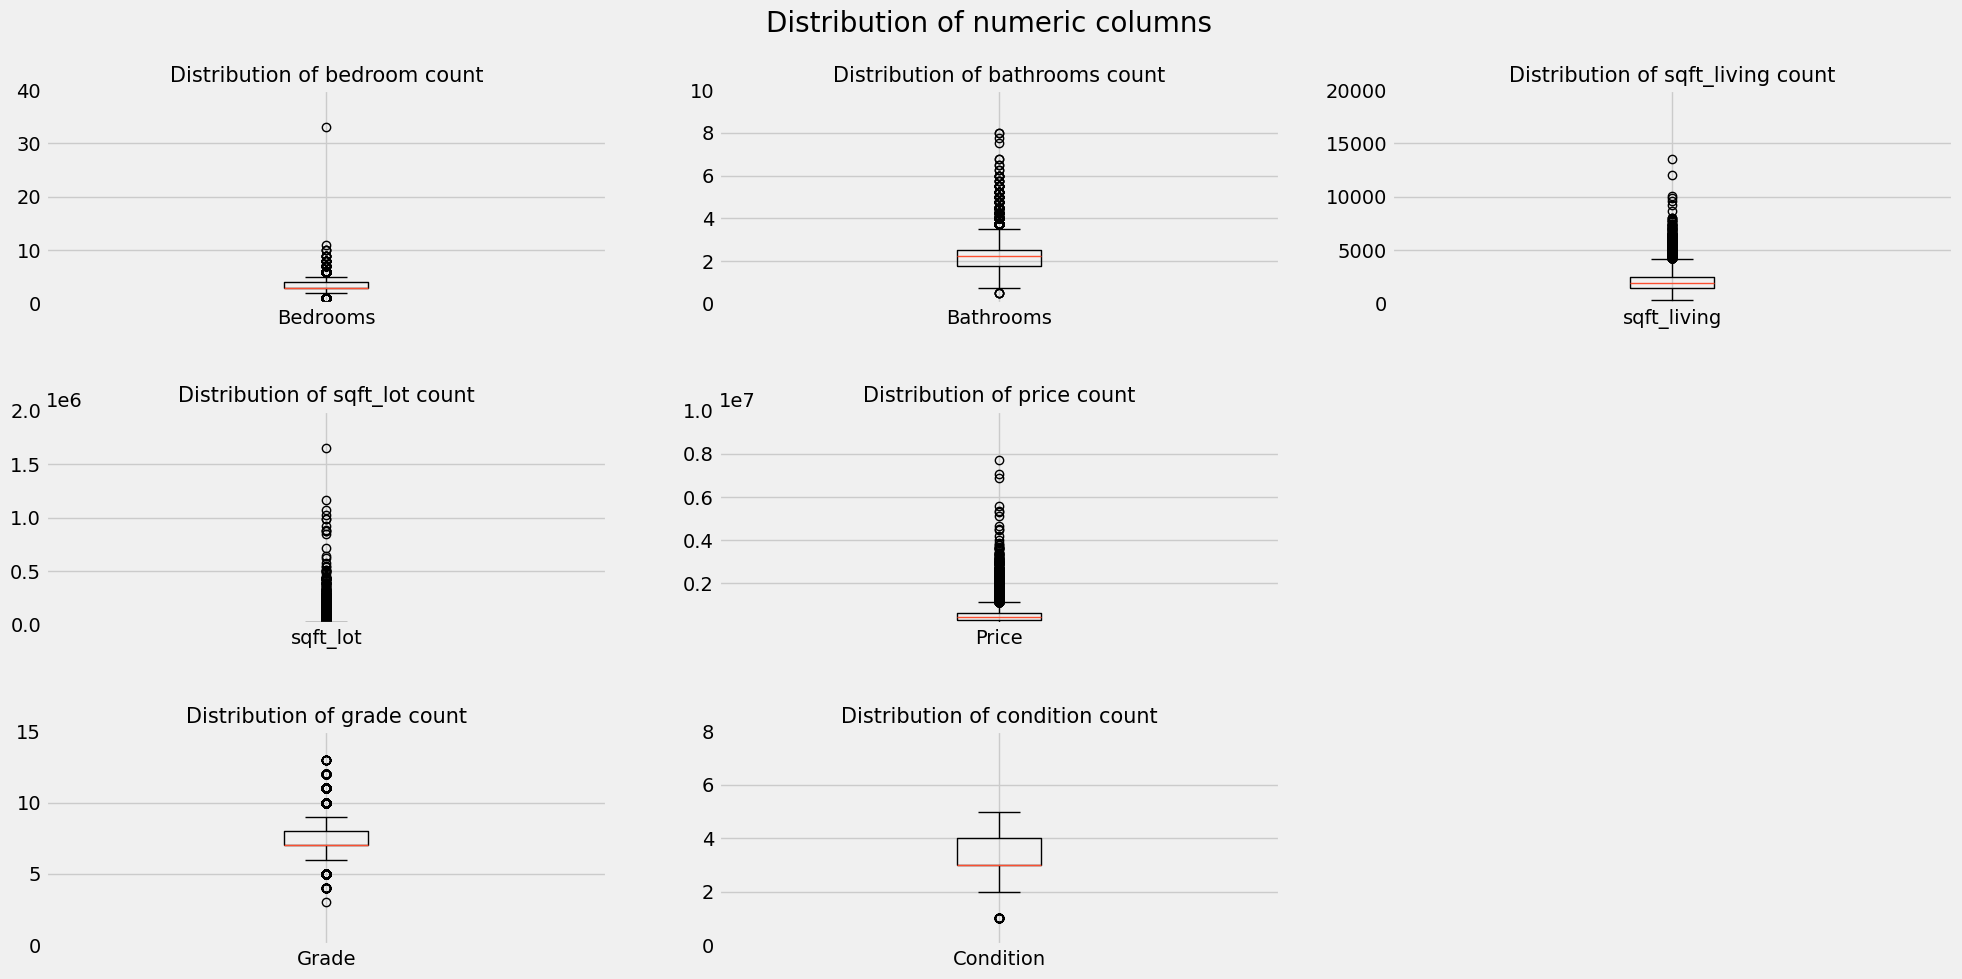

In [47]:
fig, ax = plt.subplots(3,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_merged['bedrooms']) 
ax[0][0].set_xticklabels(labels=["Bedrooms"])
ax[0][0].set_ylim(0,40) 
ax[0][0].set_title("Distribution of bedroom count", fontsize = 15); 

ax[0][1].boxplot(x = df_merged['bathrooms'])
ax[0][1].set_xticklabels(labels=["Bathrooms"])
ax[0][1].set_ylim(0,10)
ax[0][1].set_title("Distribution of bathrooms count", fontsize = 15);

ax[0][2].boxplot(x = df_merged['sqft_living'])
ax[0][2].set_xticklabels(labels=["sqft_living"])
ax[0][2].set_ylim(0,20000)
ax[0][2].set_title("Distribution of sqft_living count", fontsize = 15);

ax[1][0].boxplot(x = df_merged['sqft_lot'])
ax[1][0].set_xticklabels(labels=["sqft_lot"])
ax[1][0].set_ylim(0,2000000)
ax[1][0].set_title("Distribution of sqft_lot count", fontsize = 15);
                              
ax[1][1].boxplot(x = df_merged['price'])
ax[1][1].set_xticklabels(labels=["Price"])
ax[1][1].set_ylim(100000, 10000000)
ax[1][1].set_title("Distribution of price count", fontsize = 15);

ax[2][1].boxplot(x = df_merged['condition'])
ax[2][1].set_xticklabels(labels=["Condition"])
ax[2][1].set_ylim(0, 8)
ax[2][1].set_title("Distribution of condition count", fontsize = 15);

ax[2][0].boxplot(x = df_merged['grade'])
ax[2][0].set_xticklabels(labels=["Grade"])
ax[2][0].set_ylim(0, 15)
ax[2][0].set_title("Distribution of grade count", fontsize = 15);


fig.delaxes(ax[1][2]);
fig.delaxes(ax[2][2]);

### Histograms

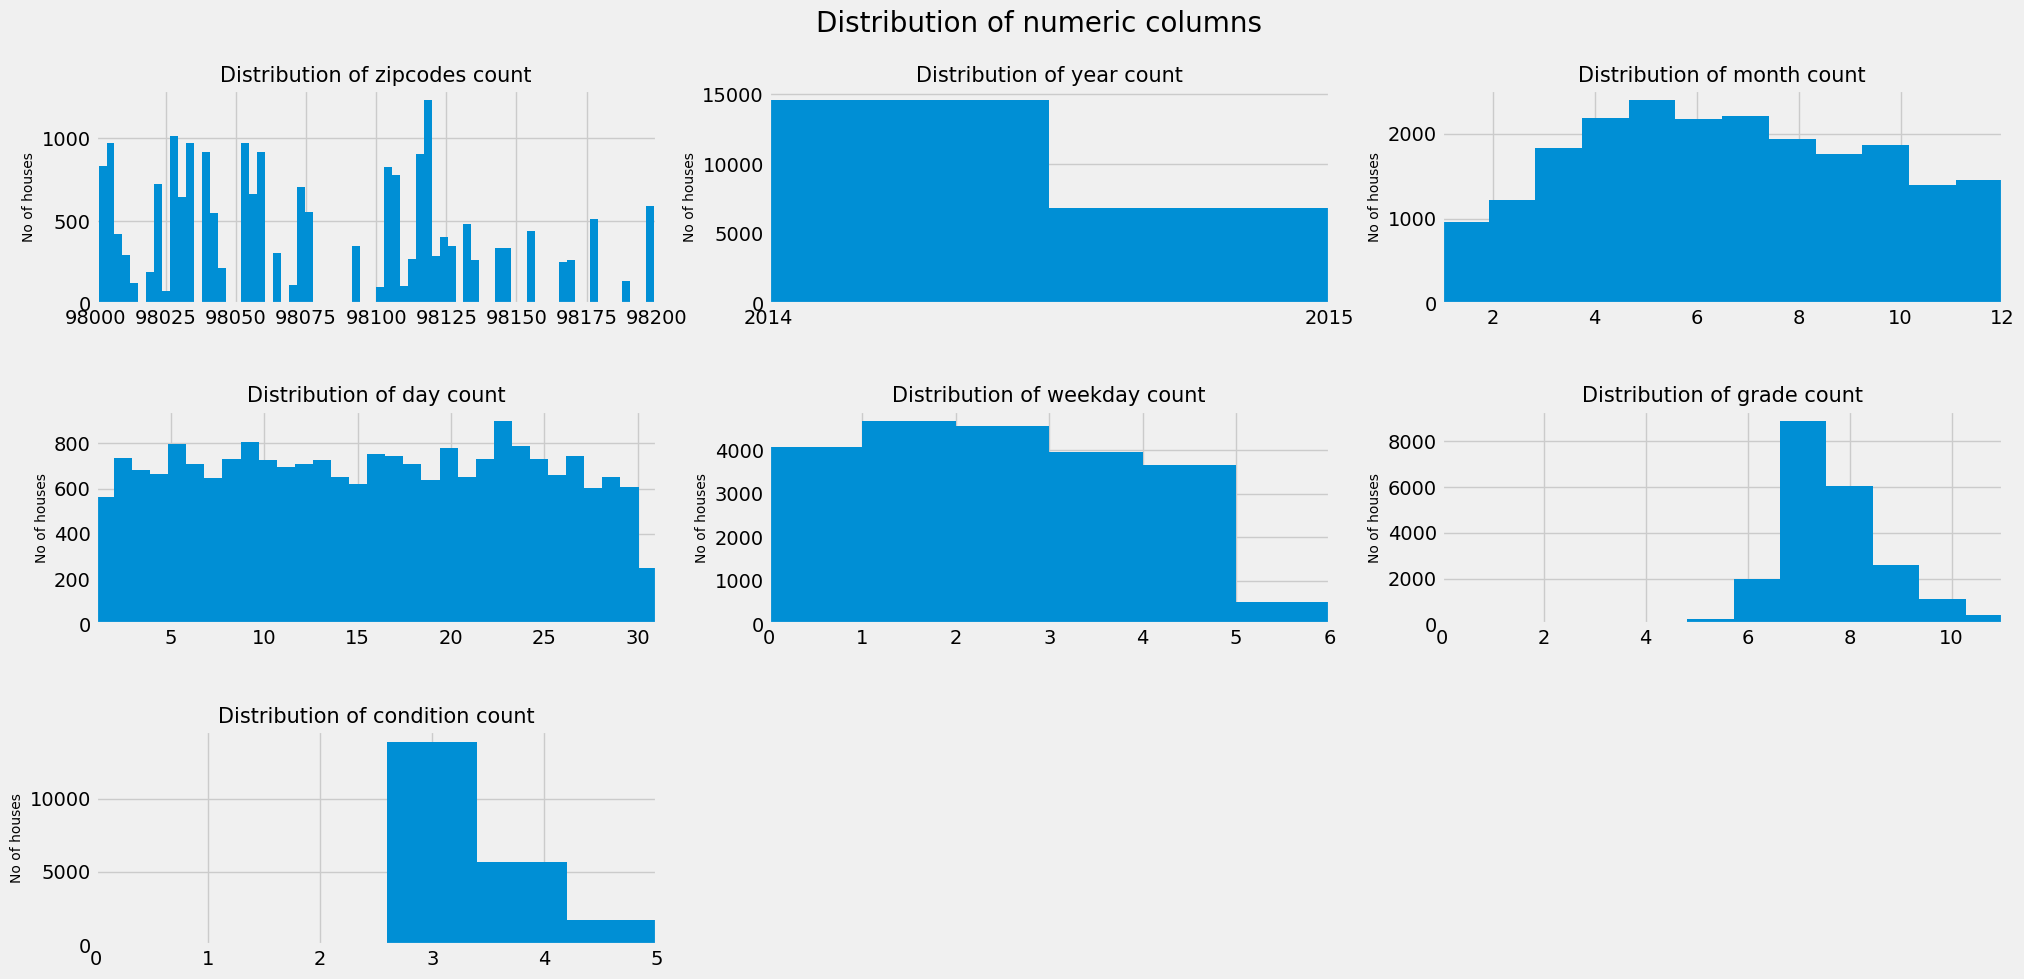

In [50]:
fig, ax = plt.subplots(3,3, figsize=(20,10)) 
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 

ax[0][0].hist(x=df_merged['zipcode'], bins=70) 
ax[0][0].set_ylabel("No of houses", fontsize = 10) 
ax[0][0].set_xlim(98000,98200) 
ax[0][0].set_title("Distribution of zipcodes count", fontsize = 15);

ax[0][1].hist(x= df_merged['date_year'], bins=2)
ax[0][1].set_ylabel("No of houses", fontsize = 10)
ax[0][1].set_xlim(2014, 2015)
ax[0][1].set_xticks([2014, 2015])
ax[0][1].set_title("Distribution of year count", fontsize = 15);

ax[0][2].hist(x=df_merged['date_month'], bins=12)
ax[0][2].set_ylabel("No of houses", fontsize = 10)
ax[0][2].set_xlim(1,12)
ax[0][2].set_title("Distribution of month count", fontsize = 15);

ax[1][0].hist(x=df_merged['date_day'], bins=31)
ax[1][0].set_ylabel("No of houses", fontsize = 10)
ax[1][0].set_xlim(1,31)
ax[1][0].set_title("Distribution of day count", fontsize = 15);
                              
ax[1][1].hist(x=df_merged['date_weekday'], bins=6)
ax[1][1].set_ylabel("No of houses", fontsize = 10)
ax[1][1].set_xlim(0,6)
ax[1][1].set_title("Distribution of weekday count", fontsize = 15);

ax[1][2].hist(x=df_merged['grade'], bins=11)
ax[1][2].set_ylabel("No of houses", fontsize = 10)
ax[1][2].set_xlim(0,11)
ax[1][2].set_title("Distribution of grade count", fontsize = 15);

ax[2][0].hist(x=df_merged['condition'], bins=5)
ax[2][0].set_ylabel("No of houses", fontsize = 10)
ax[2][0].set_xlim(0,5)
ax[2][0].set_title("Distribution of condition count", fontsize = 15);

fig.delaxes(ax[2][1]);
fig.delaxes(ax[2][2])

# Cleaning the data

### Test whether 33 bedrooms are realistic

In [ ]:
# Test wether 33 bedrooms are realsitic
df_bedroom = df_merged.query("bedrooms == 33")
df_bedroom

# 33 bedrooms in about 150 square meters (4,5 qm pro Zimmer) are unrealistic!

In [ ]:
# Drop row with unrealistic data
df_merged = df_merged.drop([6071])

### Drop duplicated data

In [ ]:
df_merged = df_merged.drop_duplicates(subset=['house_id'])
df_merged["house_id"].duplicated().value_counts()

In [322]:
df_clean = df_merged.copy()

# Relationships in the data

Compute the correlation matrix and plot it.
Check the relationships between the values in your hypothesis and the targe (price)
Are all the conclusions expected or unexpected?
If helpful create new features by combining existing ones, e.g. if you have distance and time you could derive the speed.

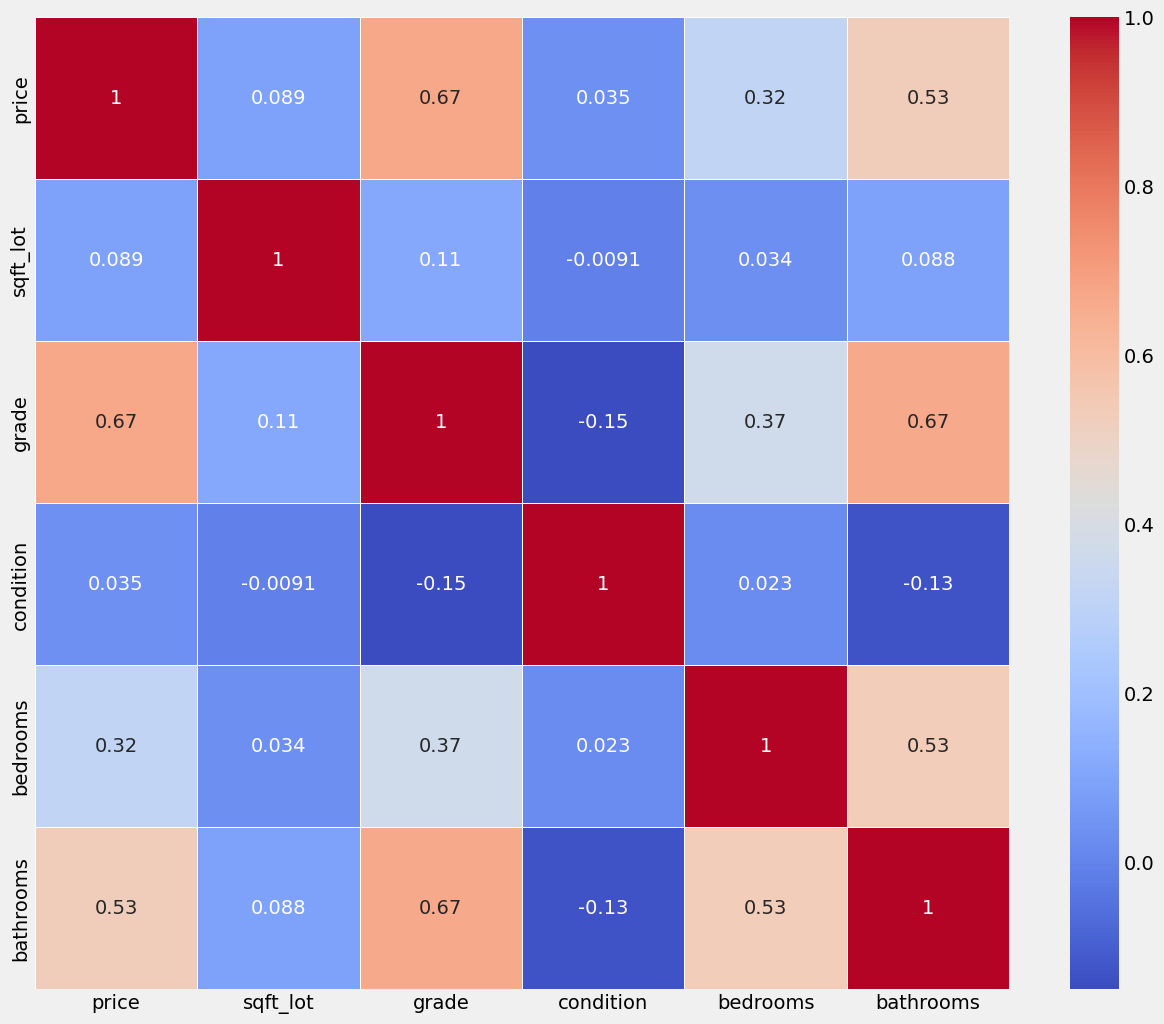

In [90]:
# correlation matrix between these variables
corr_columns=["price", "sqft_lot", "grade", "condition", "bedrooms", "bathrooms"]
corr_mtrx=df_clean[corr_columns].corr()
corr_mtrx

# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

# Define nice neighborhoods

In [323]:
df_clean["price_squarefoot"] = df_clean["price"]/df_clean["sqft_lot"]

df_clean["condition_true"] = np.where(df_clean["condition"] > 2, True, False)
df_clean["grade_true"] = np.where((df_clean["grade"] > 6) & (df_clean["grade"] < 10), True, False)
df_group = df_clean.groupby("zipcode")["grade_true"].value_counts(normalize=True).unstack(fill_value=0)
df_group = df_group.reset_index()
df_group_met = df_group.rename(columns={True: "condition_met"})
df_group_met["condition_met"] = df_group_met["condition_met"] *100
df_group_met

grade_true,zipcode,False,condition_met
0,98001,0.12,87.99
1,98002,0.31,69.04
2,98003,0.07,92.75
3,98004,0.33,66.98
4,98005,0.17,83.33
...,...,...,...
65,98177,0.15,85.04
66,98178,0.33,67.44
67,98188,0.17,82.96
68,98198,0.17,82.91


### Plots of house prices and proportion of houses with grade between 6 and 10

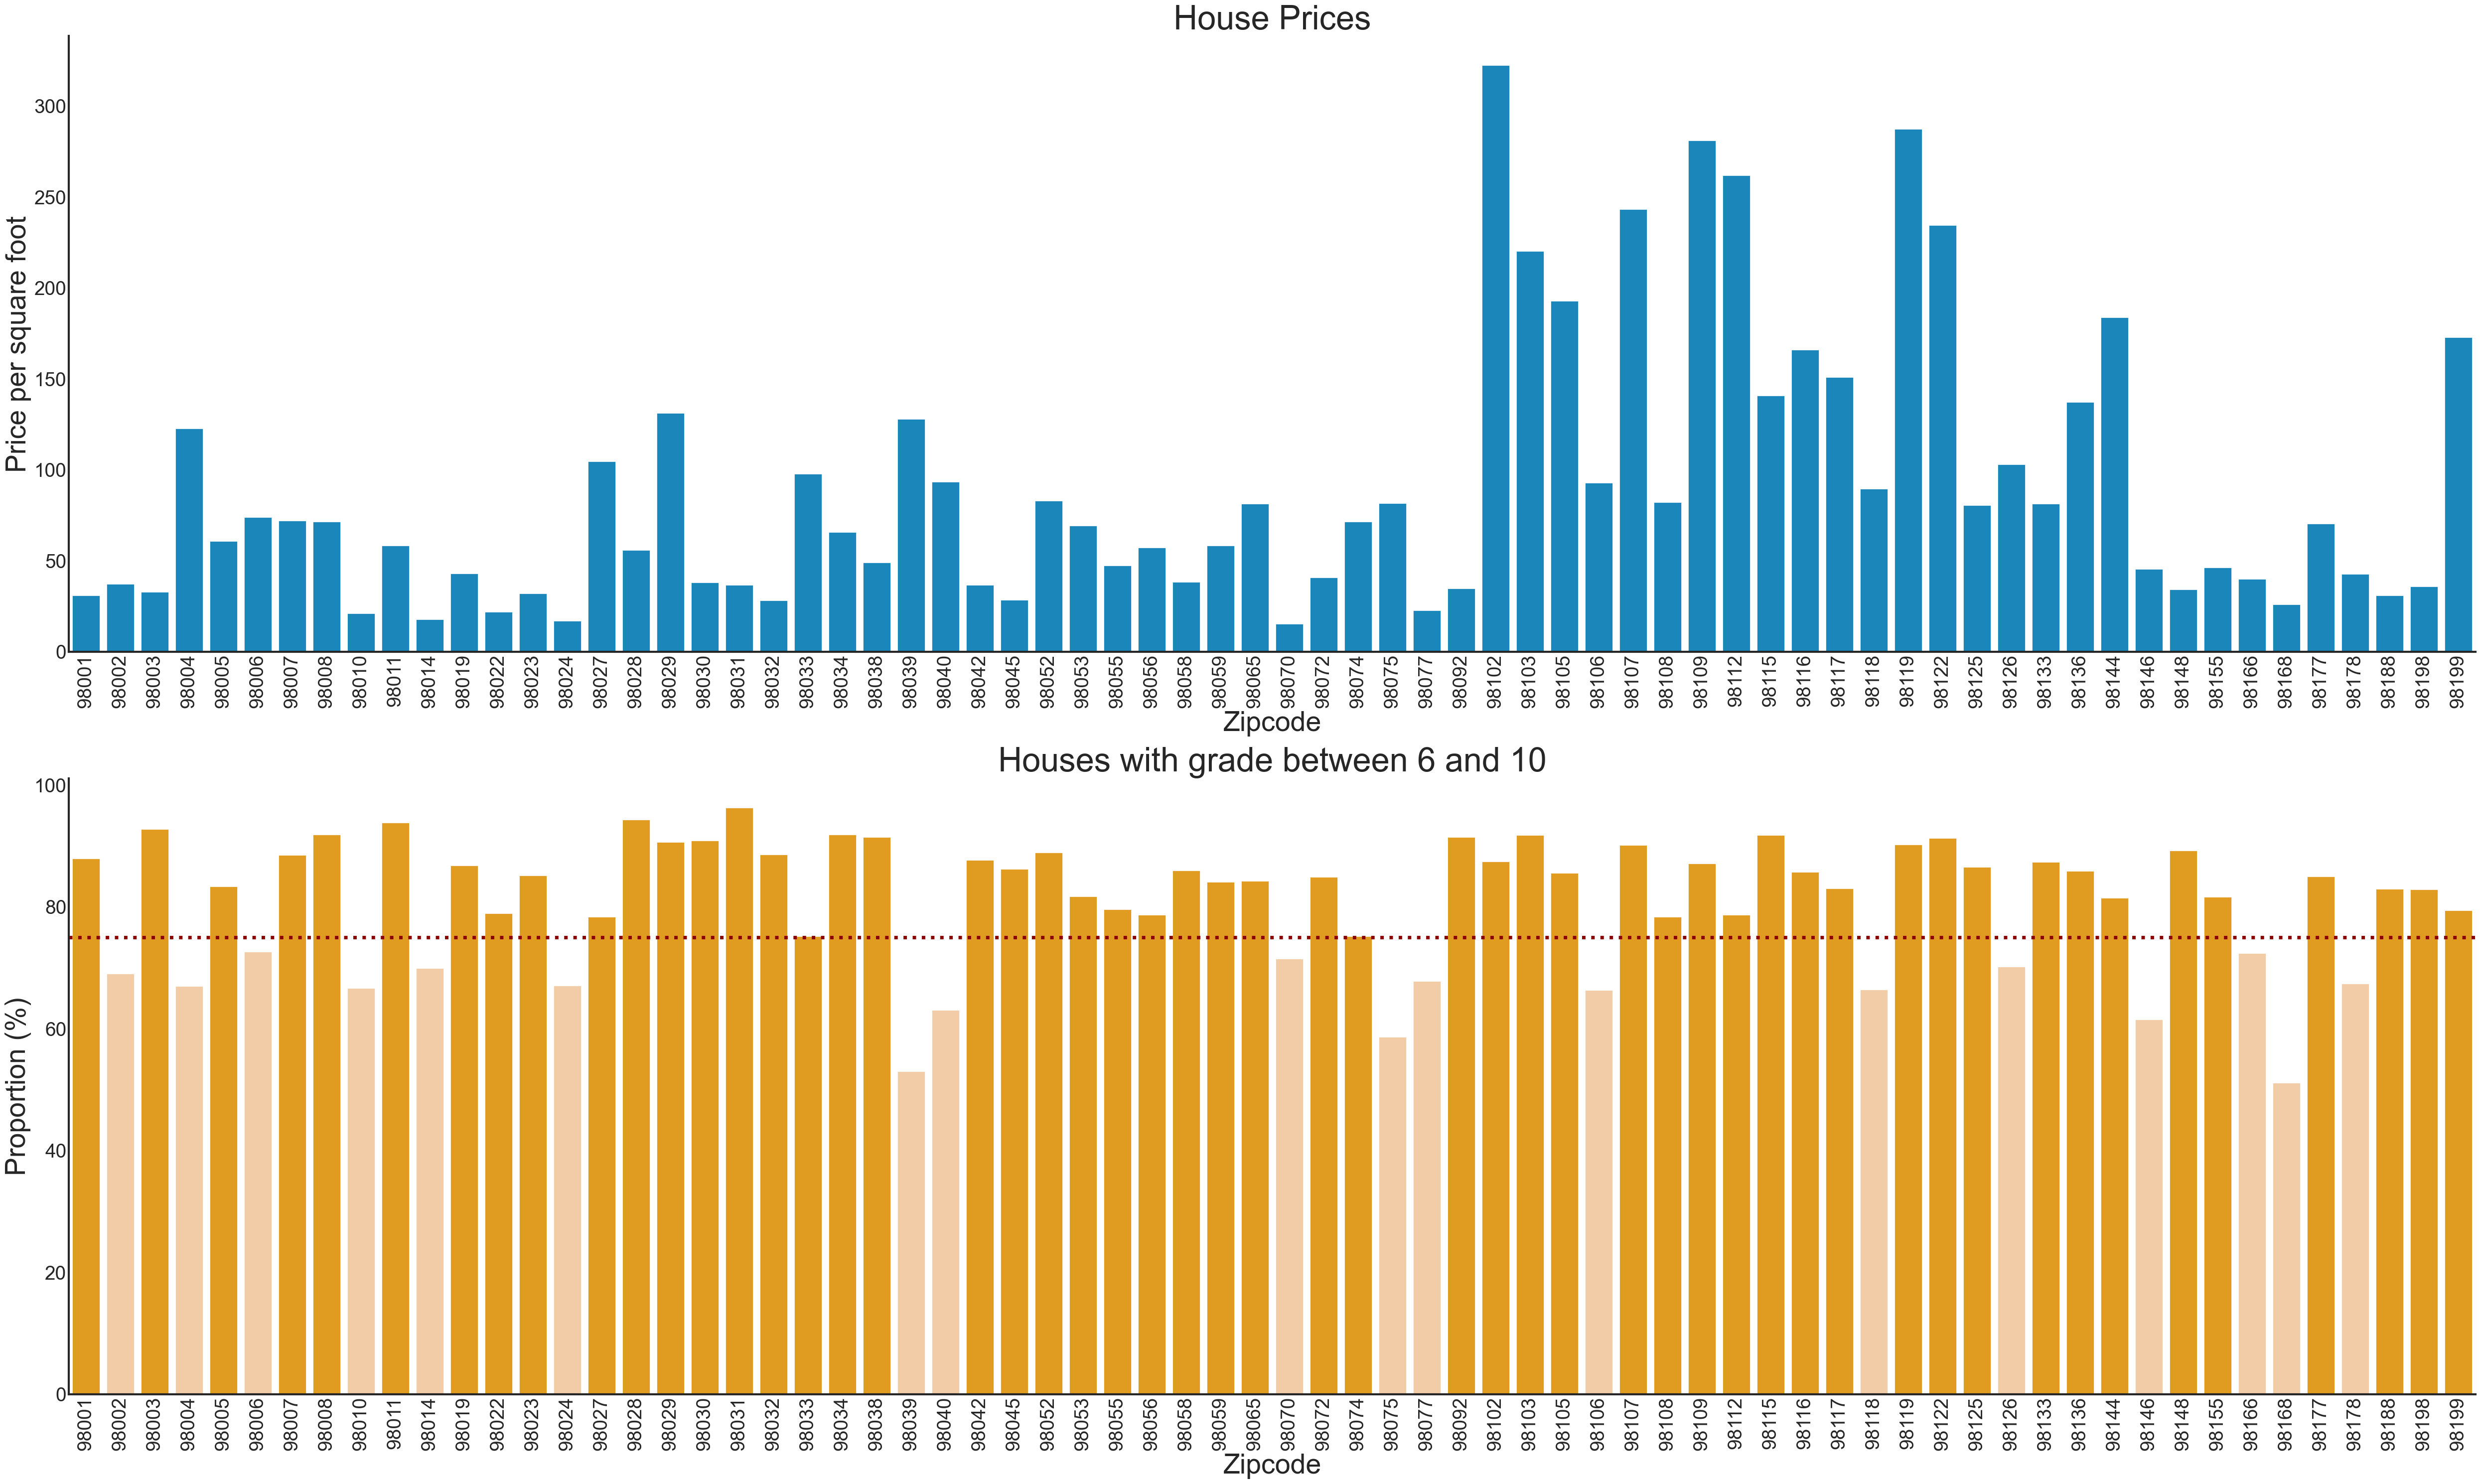

In [663]:
sns.set_style("white")
colors = ["#FFCC99" if value < 75 else "orange" for value in df_group_met["condition_met"]]

fix, axes = plt.subplots(2, 1, figsize=(50,30))
sns.barplot(data = df_clean, x="zipcode", y="price_squarefoot", ax=axes[0], errorbar=None)
axes[0].set_title("House Prices", fontsize=48)
axes[0].tick_params(axis="x", rotation=90, labelsize=28)
axes[0].tick_params(axis="y", labelsize=28)
axes[0].set_ylabel("Price per square foot", fontsize=40)
axes[0].set_xlabel("Zipcode", fontsize=40)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

sns.barplot(data = df_group_met, x="zipcode", y="condition_met", ax=axes[1], errorbar=None, palette=colors)
axes[1].set_title("Houses with grade between 6 and 10", fontsize=48)
axes[1].tick_params(axis="x", rotation=90, labelsize=28)
axes[1].tick_params(axis="y", labelsize=28)
axes[1].set_ylabel("Proportion (%)", fontsize=40)
axes[1].set_xlabel("Zipcode", fontsize=40)
axes[1].axhline(y=75, color="darkred", linestyle ="dotted", linewidth=5)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

plt.tight_layout()
#plt.savefig("overview.png", dpi=300, bbox_inches="tight")
plt.show()

### Remove zipcodes, in which proportion of houses with grade between 6 and 10 is below 75%

In [348]:
df_group_met_clean = df_group_met[df_group_met["condition_met"] > 75].reset_index()
df_group_met_clean_list = df_group_met_clean["zipcode"].tolist()
filtered_list = df_clean[df_clean["zipcode"].isin(df_group_met_clean_list)]

# get 5 cheapest zipcodes
df_zipcode = filtered_list.groupby("zipcode")["price_squarefoot"].mean()
cheapest_top5 = df_zipcode.nsmallest(5).index.tolist()
filtered_list_final = filtered_list[filtered_list["zipcode"].isin(cheapest_top5)]
print(cheapest_top5)

[98022, 98032, 98045, 98001, 98188]


### Mean house price in 5 cheapest nice neighborhoods 

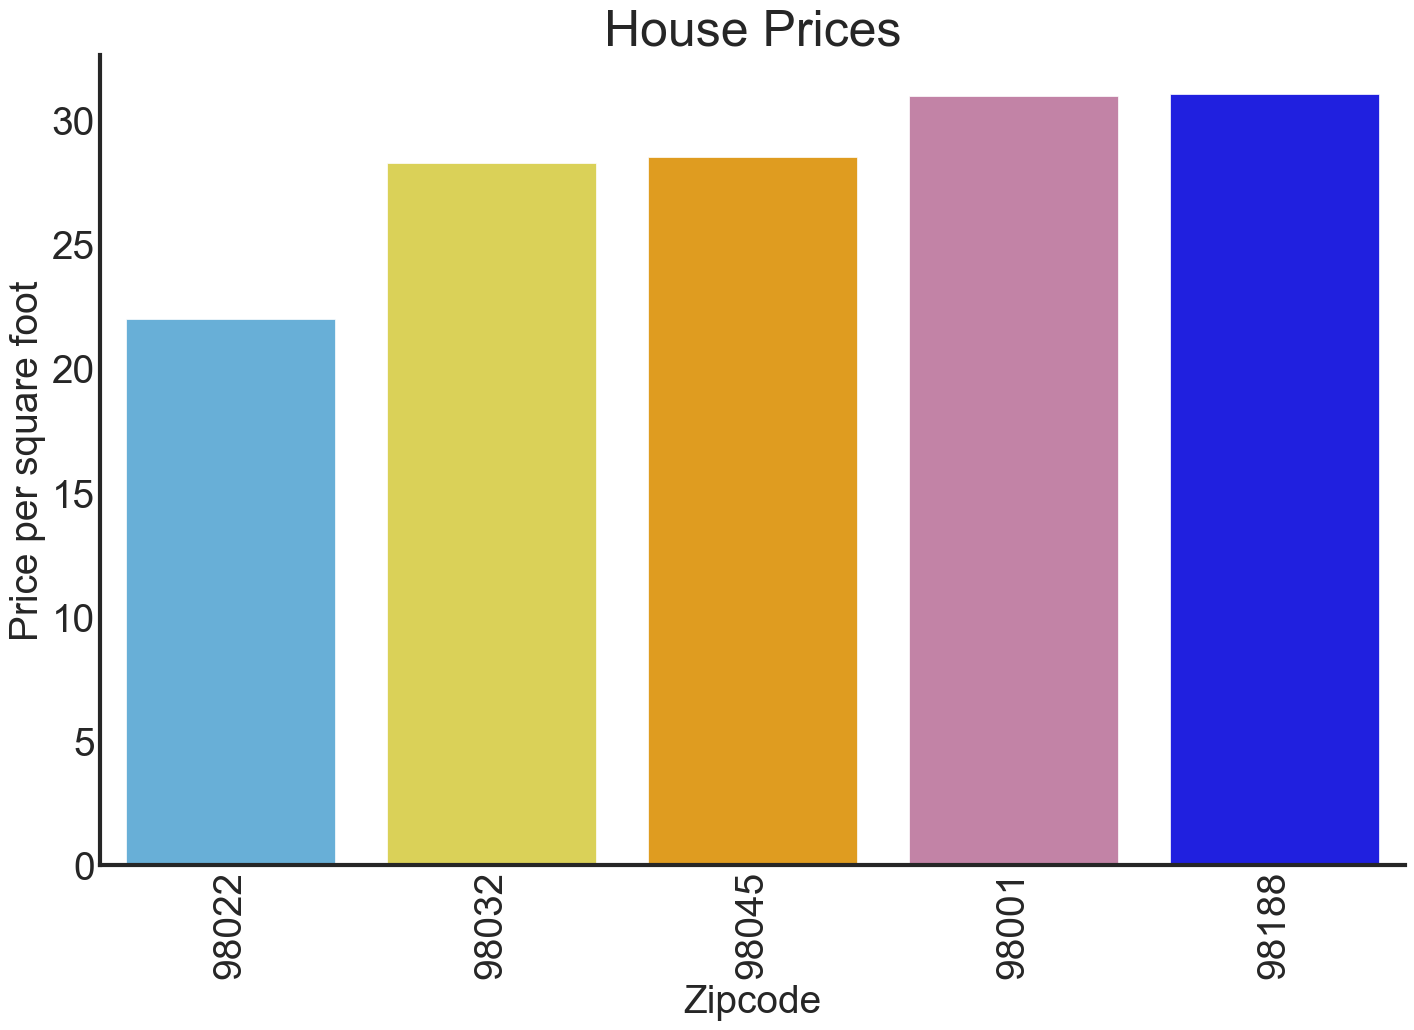

In [655]:
color = ["#56B4E9", "#F0E442", "orange", "#CC79A7", "blue"]

fix, ax = plt.subplots(1, 1, figsize=(15,10))
sns.barplot(data = filtered_list_final, x="zipcode", y="price_squarefoot", ax=ax, errorbar=None, palette=color, order = ["98022", "98032", "98045", "98001", "98188"])
ax.set_title("House Prices", fontsize=36)
ax.tick_params(axis="x", rotation=90, labelsize=28)
ax.tick_params(axis="y", labelsize=28)
ax.set_ylabel("Price per square foot", fontsize=28)
ax.set_xlabel("Zipcode", fontsize=28)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig("house_prices2.png", dpi=300, bbox_inches="tight")
plt.show()

### Get mean price

In [658]:
means = filtered_list_final.groupby("zipcode")["price_squarefoot"].mean()
means

zipcode
98001   30.98
98022   21.99
98032   28.29
98045   28.54
98188   31.07
Name: price_squarefoot, dtype: float64

### Visualize 5 cheapest nice neighborhoods in map

In [654]:
# Create a map centered around the average latitude and longitude
center_lat = filtered_list_final['lat'].mean()
center_lon = filtered_list_final['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# colors
colors = ["#F0E442", "#blue", "#56B4E9", "#CC79A7", "orange"]
zipcode_colors = {zip_: colors[i % len(colors)] for i, zip_ in enumerate(filtered_list_final["zipcode"].unique())}

zipcode_groups = filtered_list_final.groupby("zipcode")
print(list(zipcode_groups.groups.keys()))

def create_polygon(coords):
    if len(coords)<3:
        coords = coords + [(coords[0][0] + 0.0001, coords[0][0] + 0.0001)]
    points = MultiPoint(coords)
    convex_hull = points.convex_hull
    return points.convex_hull

for zipcode, group in zipcode_groups:
    coords = list(zip(group["lat"], group["long"]))

    print(f"Processing zipcode: {zipcode}, count: {len(group)}")
    polygon = create_polygon(coords)

# Add markers to the map
    folium.Polygon(
        locations=[(lat, lon) for lat, lon in 
                   polygon.exterior.coords],
        color=zipcode_colors[zipcode],
        fill=True,
        fill_color=zipcode_colors[zipcode],
        fill_opacity=0.2,
        popup= f"zipcode: {zipcode}"
    ).add_to(m)

# Save the map to an HTML file
#m.save("csv_map_areas.html")

# Display the map in a Jupyter notebook
#m

['98001', '98022', '98032', '98045', '98188']
Processing zipcode: 98001, count: 358
Processing zipcode: 98022, count: 233
Processing zipcode: 98032, count: 123
Processing zipcode: 98045, count: 218
Processing zipcode: 98188, count: 135


# House price dependent on the numbers of bedrooms

In [669]:
df_bedroom_nr = filtered_list_final.copy()
df_bedroom_nr["bedrooms"] = df_bedroom_nr["bedrooms"].astype(int)
df_bedroom_nr["zipcode"] = df_bedroom_nr["zipcode"].astype(str)

# Only houses with 3-5 bedrooms
df_bedroom_nr = df_bedroom_nr.query("bedrooms > 2 and bedrooms < 6")
df_bedroom_nr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 9 to 21582
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   house_id          960 non-null    int64         
 1   bedrooms          960 non-null    int64         
 2   bathrooms         960 non-null    float64       
 3   sqft_living       960 non-null    float64       
 4   sqft_lot          960 non-null    float64       
 5   floors            960 non-null    float64       
 6   waterfront        861 non-null    float64       
 7   view              956 non-null    float64       
 8   condition         960 non-null    int64         
 9   grade             960 non-null    int64         
 10  sqft_above        960 non-null    float64       
 11  sqft_basement     936 non-null    float64       
 12  year_built        960 non-null    int64         
 13  year_renovated    784 non-null    float64       
 14  zipcode           960 non-nul

### Plot prices based on bedroom number

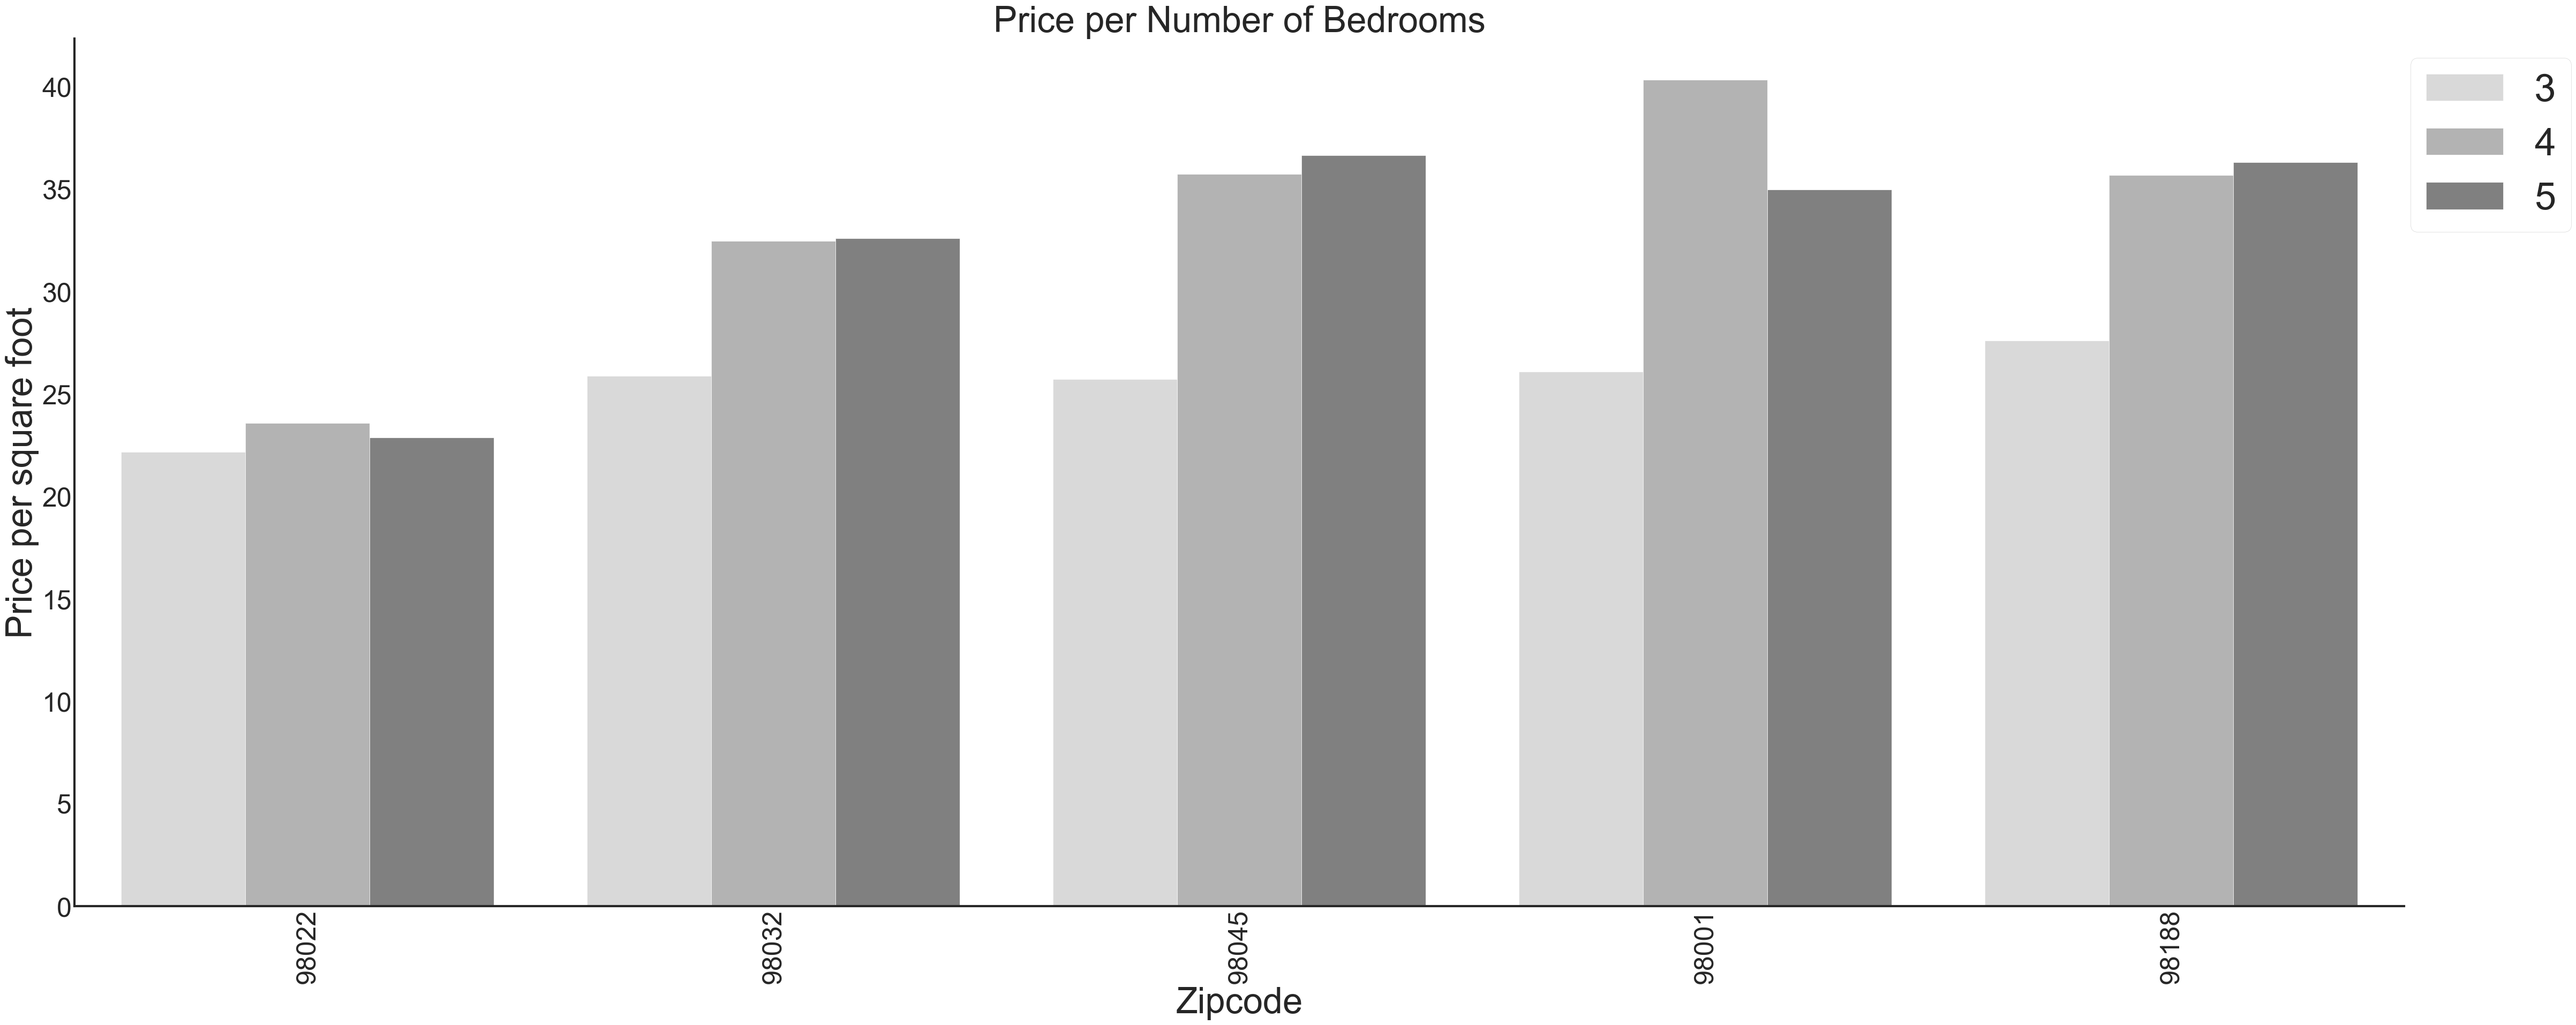

In [670]:
fix, ax = plt.subplots(1, 1, figsize=(50,20))
bedroom_colors = {
    3: "#D9D9D9",
    4: "#B3B3B3",
    5: "#808080"
}

sns.barplot(data = df_bedroom_nr, x="zipcode", y="price_squarefoot", hue="bedrooms", ax=ax, errorbar=None, palette = bedroom_colors, order = ["98022", "98032", "98045", "98001", "98188"])
ax.set_title("Price per Number of Bedrooms", fontsize=48)
ax.tick_params(axis="x", rotation=90, labelsize=36)
ax.tick_params(axis="y", labelsize=36)
ax.set_ylabel("Price per square foot", fontsize=48)
ax.set_xlabel("Zipcode", fontsize=48)
ax. legend(loc="upper right", bbox_to_anchor=(1.08,1), fontsize=52)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#plt.savefig("bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()

# Season and house price

### Add categorical variable to define the season

In [410]:
df_season = filtered_list_final.copy()

def get_season(x):
    if (x.month == 12) | (x.month <= 2):
        return 'winter'
    if (x.month >= 3) & (x.month <= 5):
        return 'spring'
    if (x.month >= 6) & (x.month <= 8):
        return 'summer'
    if (x.month >= 9) & (x.month <= 11):
        return 'autumn'
    

df_season['season'] = df_season['date'].map(get_season)
df_season.head()

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price,id,date_year,date_month,date_day,date_weekday,price_squarefoot,condition_true,grade_true,season
9,6200017,3.00,1.00,"1,340.00","21,336.00",1.50,0.00,0.00,4,5,...,"281,000.00",4330,2014,11,12,2,13.17,True,False,autumn
66,41000454,2.00,1.00,880.00,"9,000.00",1.00,0.00,0.00,3,5,...,"130,000.00",705,2014,8,15,4,14.44,True,False,summer
68,42000065,2.00,1.00,"1,450.00","9,150.00",1.00,0.00,0.00,4,7,...,"355,000.00",9438,2015,3,5,3,38.80,True,True,spring
71,42000245,4.00,2.00,"1,520.00","19,672.00",1.00,0.00,0.00,3,6,...,"171,000.00",19548,2014,6,13,4,8.69,True,False,summer
87,59500050,4.00,2.25,"2,010.00","7,280.00",2.00,0.00,0.00,4,8,...,"324,900.00",16643,2014,12,16,1,44.63,True,True,winter


### Boxplot of the data

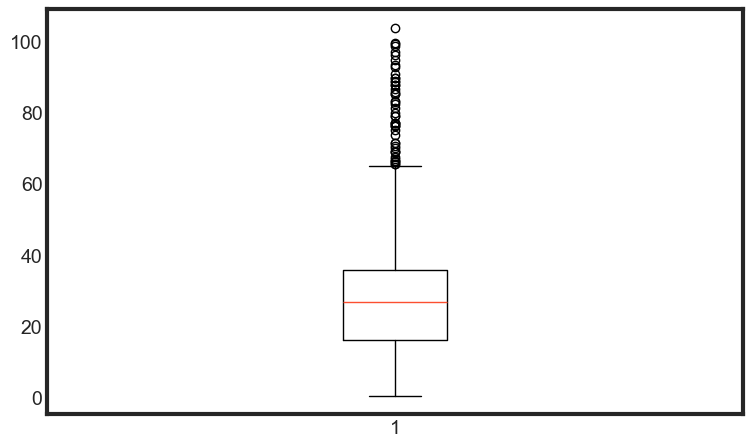

In [419]:
plt.boxplot(df_season['price_squarefoot'])
plt.show()

### Barplot of price dependent on the season

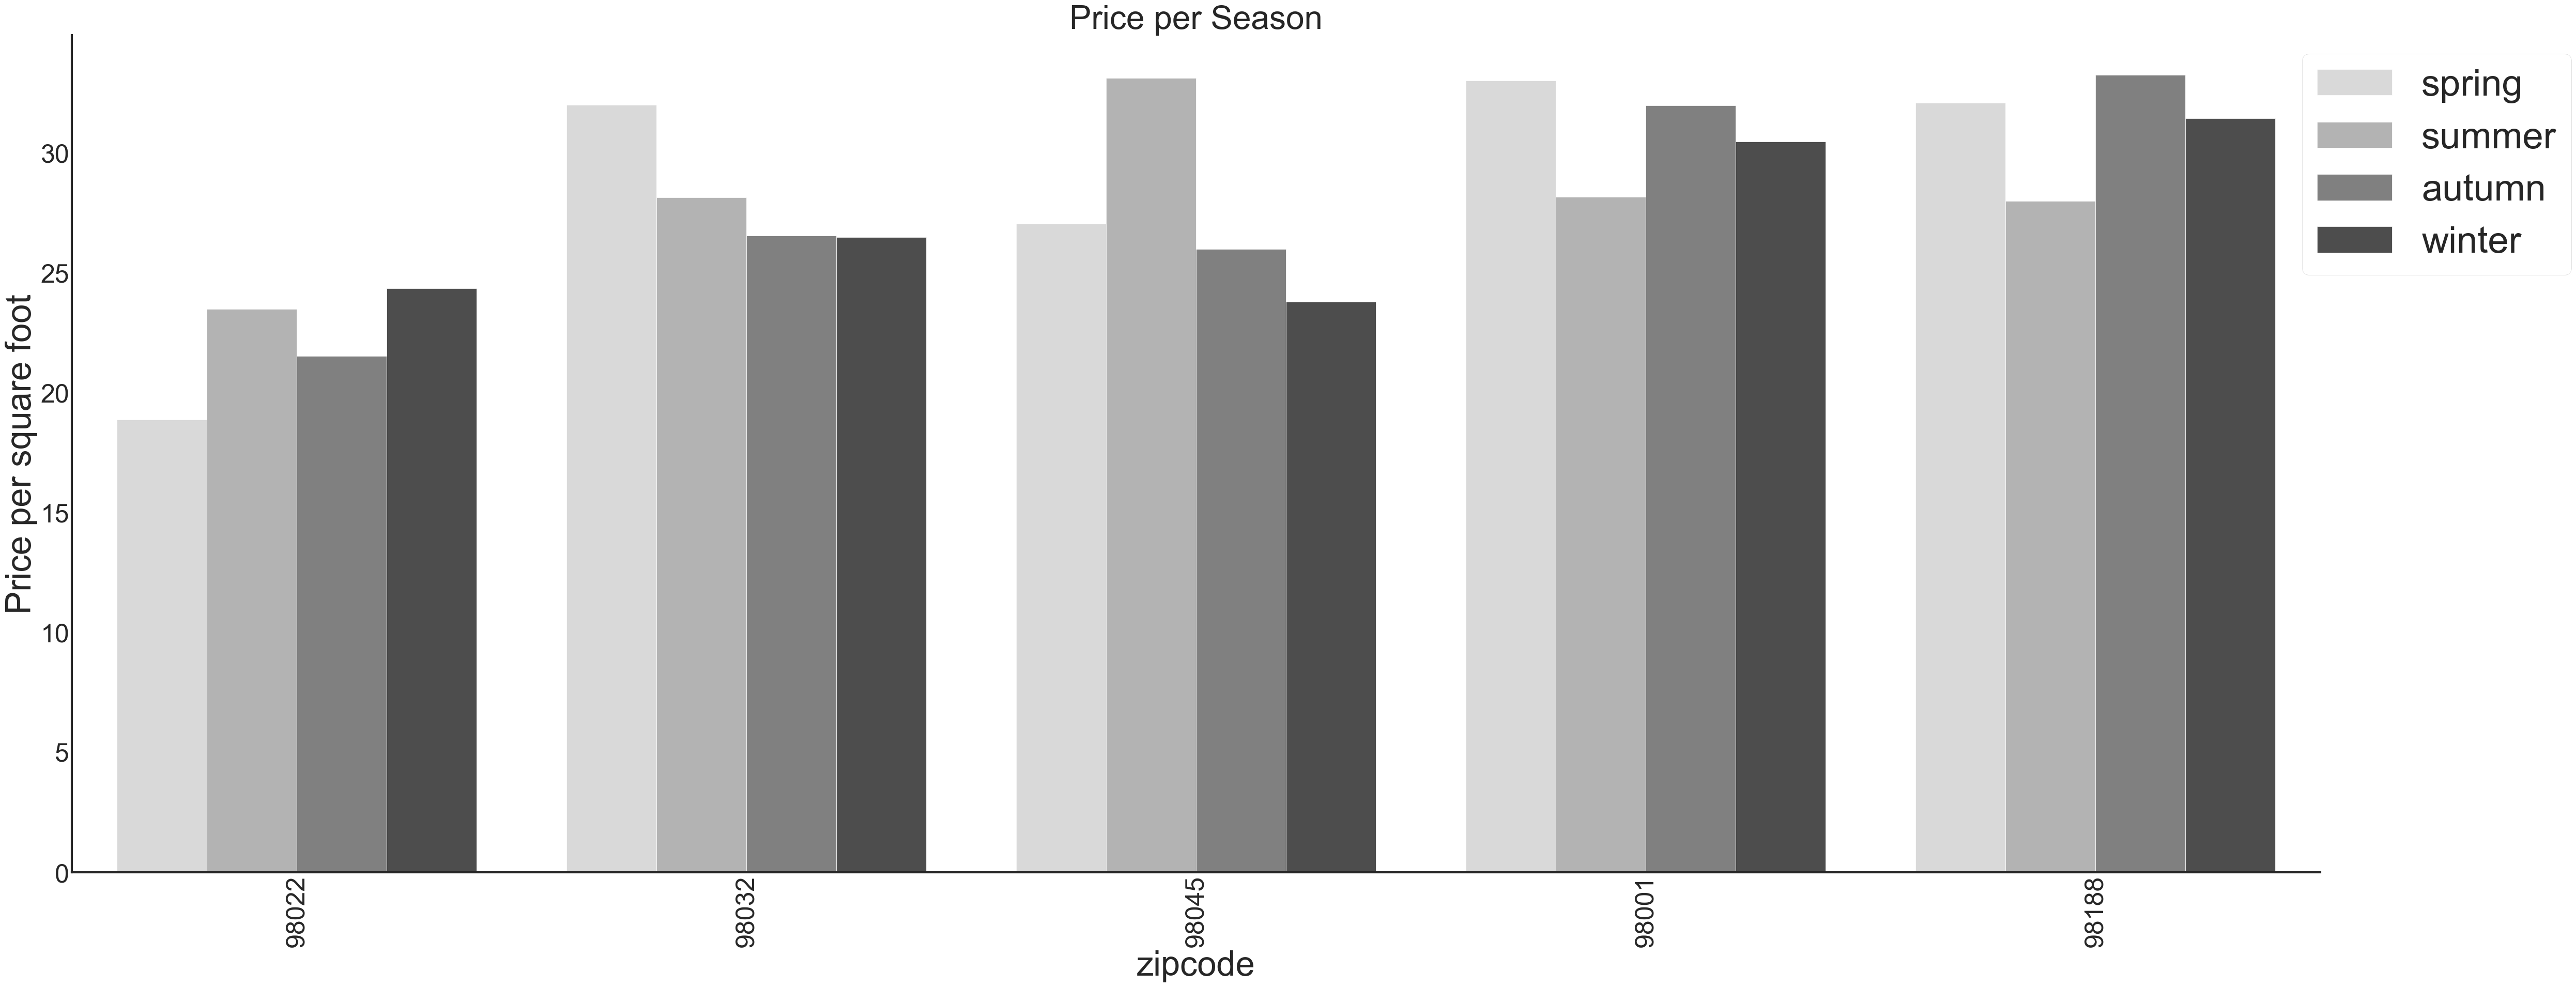

In [662]:
fix, ax = plt.subplots(1, 1, figsize=(50,20))

season_colors = {
    "spring": "#D9D9D9",
    "summer": "#B3B3B3",
    "autumn": "#808080",
    "winter": "#4D4D4D"
}

sns.barplot(data = df_season, x="zipcode", y="price_squarefoot", hue="season", ax=ax, errorbar=None, palette=season_colors, hue_order=["spring", "summer", "autumn", "winter"], order = ["98022", "98032", "98045", "98001", "98188"])
ax.set_title("Price per Season", fontsize=46)
ax.tick_params(axis="x", rotation=90, labelsize=36)
ax.tick_params(axis="y", labelsize=36)
ax.set_ylabel("Price per square foot", fontsize=48)
ax.set_xlabel("zipcode", fontsize=48)
ax.legend(loc="upper right", bbox_to_anchor=(1.12,1), fontsize=52)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig("season2.png", dpi=300, bbox_inches="tight")
plt.show()